# 6.4 MACHINE LEARNING

### This script contains the following:
#### 1. IMPORTING DATA AND DATA LIBRARIES
#### 2. DATA PREPARATION FOR REGRESSION ANALYSIS
#### 3. REGRESSION ANALYSIS 

### 1.IMPORTING DATA AND DATA LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

### DEFINING THE PATH 

In [3]:
path = r'C:\Users\gryzu\Supply Chain Management'

In [4]:
path

'C:\\Users\\gryzu\\Supply Chain Management'

### IMPORTING DATASET

In [5]:
path_to_pickle = os.path.join(path, '1 DATA', 'FORMATTED', 'ASIASCM_UPDATED.pkl')

In [6]:
asia = pd.read_pickle(path_to_pickle)

In [9]:
# Checking the dataset 
asia.head()

,Type,Days for shipment (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Id,Category Name,Department Id,...,Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Date,Shipping Mode,Price Category
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,2,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2018-03-02 22:56:00,Standard Class,Middle price
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,2,...,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,Middle price
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,2,...,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,Middle price
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,2,...,95.180000,Eastern Asia,Guangdong,COMPLETE,73,Smart watch,327.75,2018-01-15 10:42:00,First Class,Middle price
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,2,...,68.430000,Eastern Asia,Guangdong,PROCESSING,73,Smart watch,327.75,2018-01-15 10:21:00,First Class,Middle price


The cleaning process of data has been done in the task 6.1 and additinally checked in 6.2-6.3 

In [12]:
# Checking all columns
asia.columns

Index(['Type', 'Days for shipment (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late Delivery Risk', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Date', 'Item Profit Ratio', 'Item Quantity', 'Sales',
       'Items Total', 'Profit Per Order', 'Order Region', 'Order State',
       'Order Status', 'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Date', 'Shipping Mode', 'Price Category'],
      dtype='object')

### 2.DATA PREPARATION FOR REGRESSION ANALYSIS

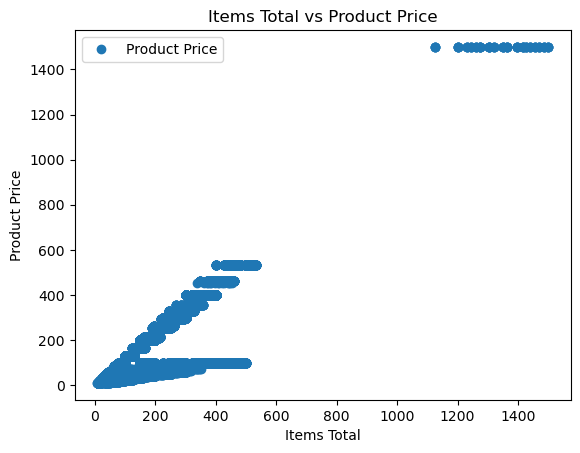

In [24]:
# Creating a scatterplot to see the relationship between the total items sold and price

asia.plot(x = 'Items Total', y='Product Price',style='o') 
plt.title('Items Total vs Product Price')  
plt.xlabel('Items Total')  
plt.ylabel('Product Price')  
plt.show()

Here we can see the that Items Total (the number of sold units) is considered a dependent variable. Whereas Product Price is independant variable. 

In [26]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.
X = asia['Items Total'].values.reshape(-1,1)
Y = asia['Product Price'].values.reshape(-1,1)

In [27]:
X

array([[314.6400146],
       [311.3599854],
       [309.7200012],
       ...,
       [399.980011 ],
       [395.980011 ],
       [383.980011 ]])

In [28]:
Y

array([[327.75    ],
       [327.75    ],
       [327.75    ],
       ...,
       [399.980011],
       [399.980011],
       [399.980011]])

In [30]:
# Splitting data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

The hypothesis sounds: Does sales prices influence the customer behavior in a way, that high price decreases the total items sold?

### 3.REGRESSION ANALYSIS

In [31]:
# Create a regression object.

regression = LinearRegression()

In [32]:
# Fitting the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [34]:
# Predict the values of Y by using X.

Y_predicted = regression.predict(X_test)

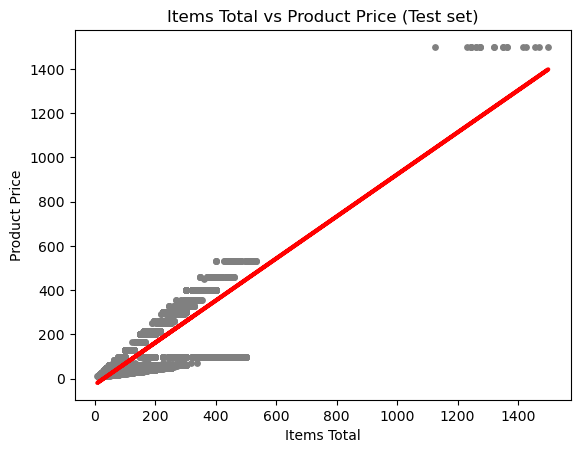

In [35]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Items Total vs Product Price (Test set)')
plot_test.xlabel('Items Total')
plot_test.ylabel('Product Price')
plot_test.show()

We can see that the trending line goes up and many dots are located around it especially in the area of price between 0 and 180. We may observe a positive relationship and good correlation in this area. However, the distance between dots and the line is getting larger after the price of 200. We need to check the accuracy of the model and afterwards make a final conclusion. 

In [50]:
# Creating objects for summary statistics
mse = mean_squared_error(Y_test, Y_predicted)

In [48]:
r2 = r2_score(Y_test, Y_predicted)

In [51]:
# Printing the model summary statistics.
print('Slope:', regression.coef_)
print('Mean squared error:', mse)
print('R2 score:', r2)

Slope: [[0.94993442]]
Mean squared error: 7030.386845584035
R2 score: 0.649966406780966


In [53]:
Y_predicted

array([[277.53266296],
       [ 12.99491502],
       [144.55133818],
       ...,
       [ 59.05723305],
       [168.33768971],
       [ 61.90703631]])

In [55]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,399.980011,277.532663
1,50.000000,12.994915
2,199.990005,144.551338
3,59.990002,142.822451
4,84.400002,41.720930
5,84.400002,50.536320
6,299.980011,221.486532
7,461.480011,398.801295
8,299.980011,244.284958
9,30.000000,24.869095


#### COMPARING HOW THE REGRESSION FITS THE TRAINING SET

In [56]:
# Predict 
Y_predicted_train = regression.predict(X_train)

In [58]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.94993442]]
Mean squared error:  7102.278992490206
R2 score:  0.666093226791428


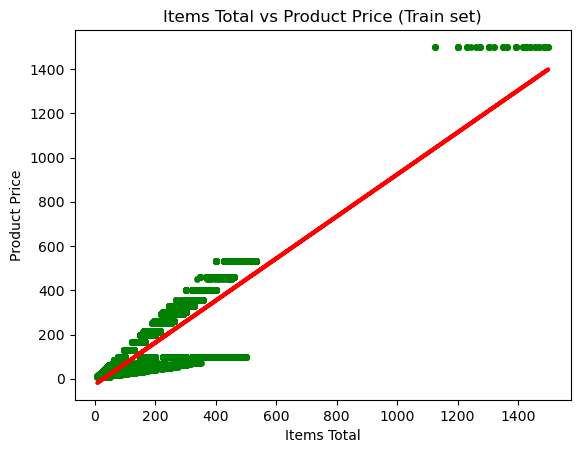

In [60]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Items Total vs Product Price (Train set)')
plot_test.xlabel('Items Total')
plot_test.ylabel('Product Price')
plot_test.show()

#### EXPLANATIONS BY COMPARING TEST AND TRAIN SET

The R2 score of approximately 0.65 indicates that the model explains around 65% of the variance in the test set. While this is not perfect, it suggests that the model has some predictive power. The Mean Squared Error (MSE) of 7030.39 indicates the average squared difference between the actual and predicted values, with higher values suggesting poorer fit. Additionally, the slope of approximately 0.95 suggests a positive linear relationship between "Items Total" and "Product Price" in the test set. It means that higher prices do not mean lower quantity sold. Assuming in overall, the model seems to perform reasonably well on the test set. It captures the association between sales prices and the total items sold, however it doesn't establish a causal relationship. There could be other factors influencing customer behavior that need to be further analysed. For example, qualitative research could help us to find these factors.

It's also essential to consider the possibility of data bias. If the training and test sets are not representative of the overall population or if there are systematic differences between the two sets (e.g., different time periods, different regions), it could lead to biased model performance. To avoid this, it's crucial to ensure that the data used for training and testing are diverse and representative of the population we want to make prediction for. Additionally, examining the residuals and checking for patterns or trends in the residuals could provide insights for potential biases or model inadequacies.